In [2]:
# Estos dos comandos evitan que haya que hacer reload cada vez que se modifica un paquete
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Anotaciones:
Desde el lado de Estadistica querriamos ver que tan bueno se aproxima a una gaussiana. Desde ML que tan bien generaliza

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter
from mpl_toolkits.mplot3d import Axes3D

In [11]:
N = -1

In [12]:
data = pd.read_csv('data/alturas-pesos-mils-train.csv')[:N]

In [13]:
test = pd.read_csv('data/alturas-pesos-mils-test.csv')

In [17]:
from BiVariateJoint import BiVariateJoint

In [25]:
data[data['Genero']=='Hombre'][['Peso','Altura']].values.shape

(4001, 2)

In [303]:
data_hombres = data.loc[data['Genero']=='Hombre'][['Peso','Altura']].values
data_mujeres = data.loc[data['Genero']=='Mujer'][['Peso','Altura']].values

In [307]:
data_hombres.mean(axis=0)

array([ 84.45643089, 174.91616521])

In [309]:
data_mujeres.mean(axis=0)

array([ 61.13789495, 161.30471261])

In [317]:
d_h_cent = data_hombres - data_hombres.mean(axis=0)

In [318]:
d_m_cent = data_mujeres - data_mujeres.mean(axis=0) 

In [321]:
d_h_cent.shape, d_m_cent.shape

((4001, 2), (3998, 2))

In [326]:
np.cov(np.vstack([d_h_cent, d_m_cent]).T)

array([[77.94597261, 53.52970001],
       [53.52970001, 50.2964779 ]])

In [30]:
data_hombres.shape, data_mujeres.shape

((4001, 2), (3998, 2))

In [31]:
data_hombres

array([[ 97.432, 181.908],
       [ 73.324, 172.459],
       [ 77.618, 172.705],
       ...,
       [ 92.479, 176.934],
       [ 83.84 , 177.866],
       [ 75.461, 170.91 ]])

# Grafico los datos

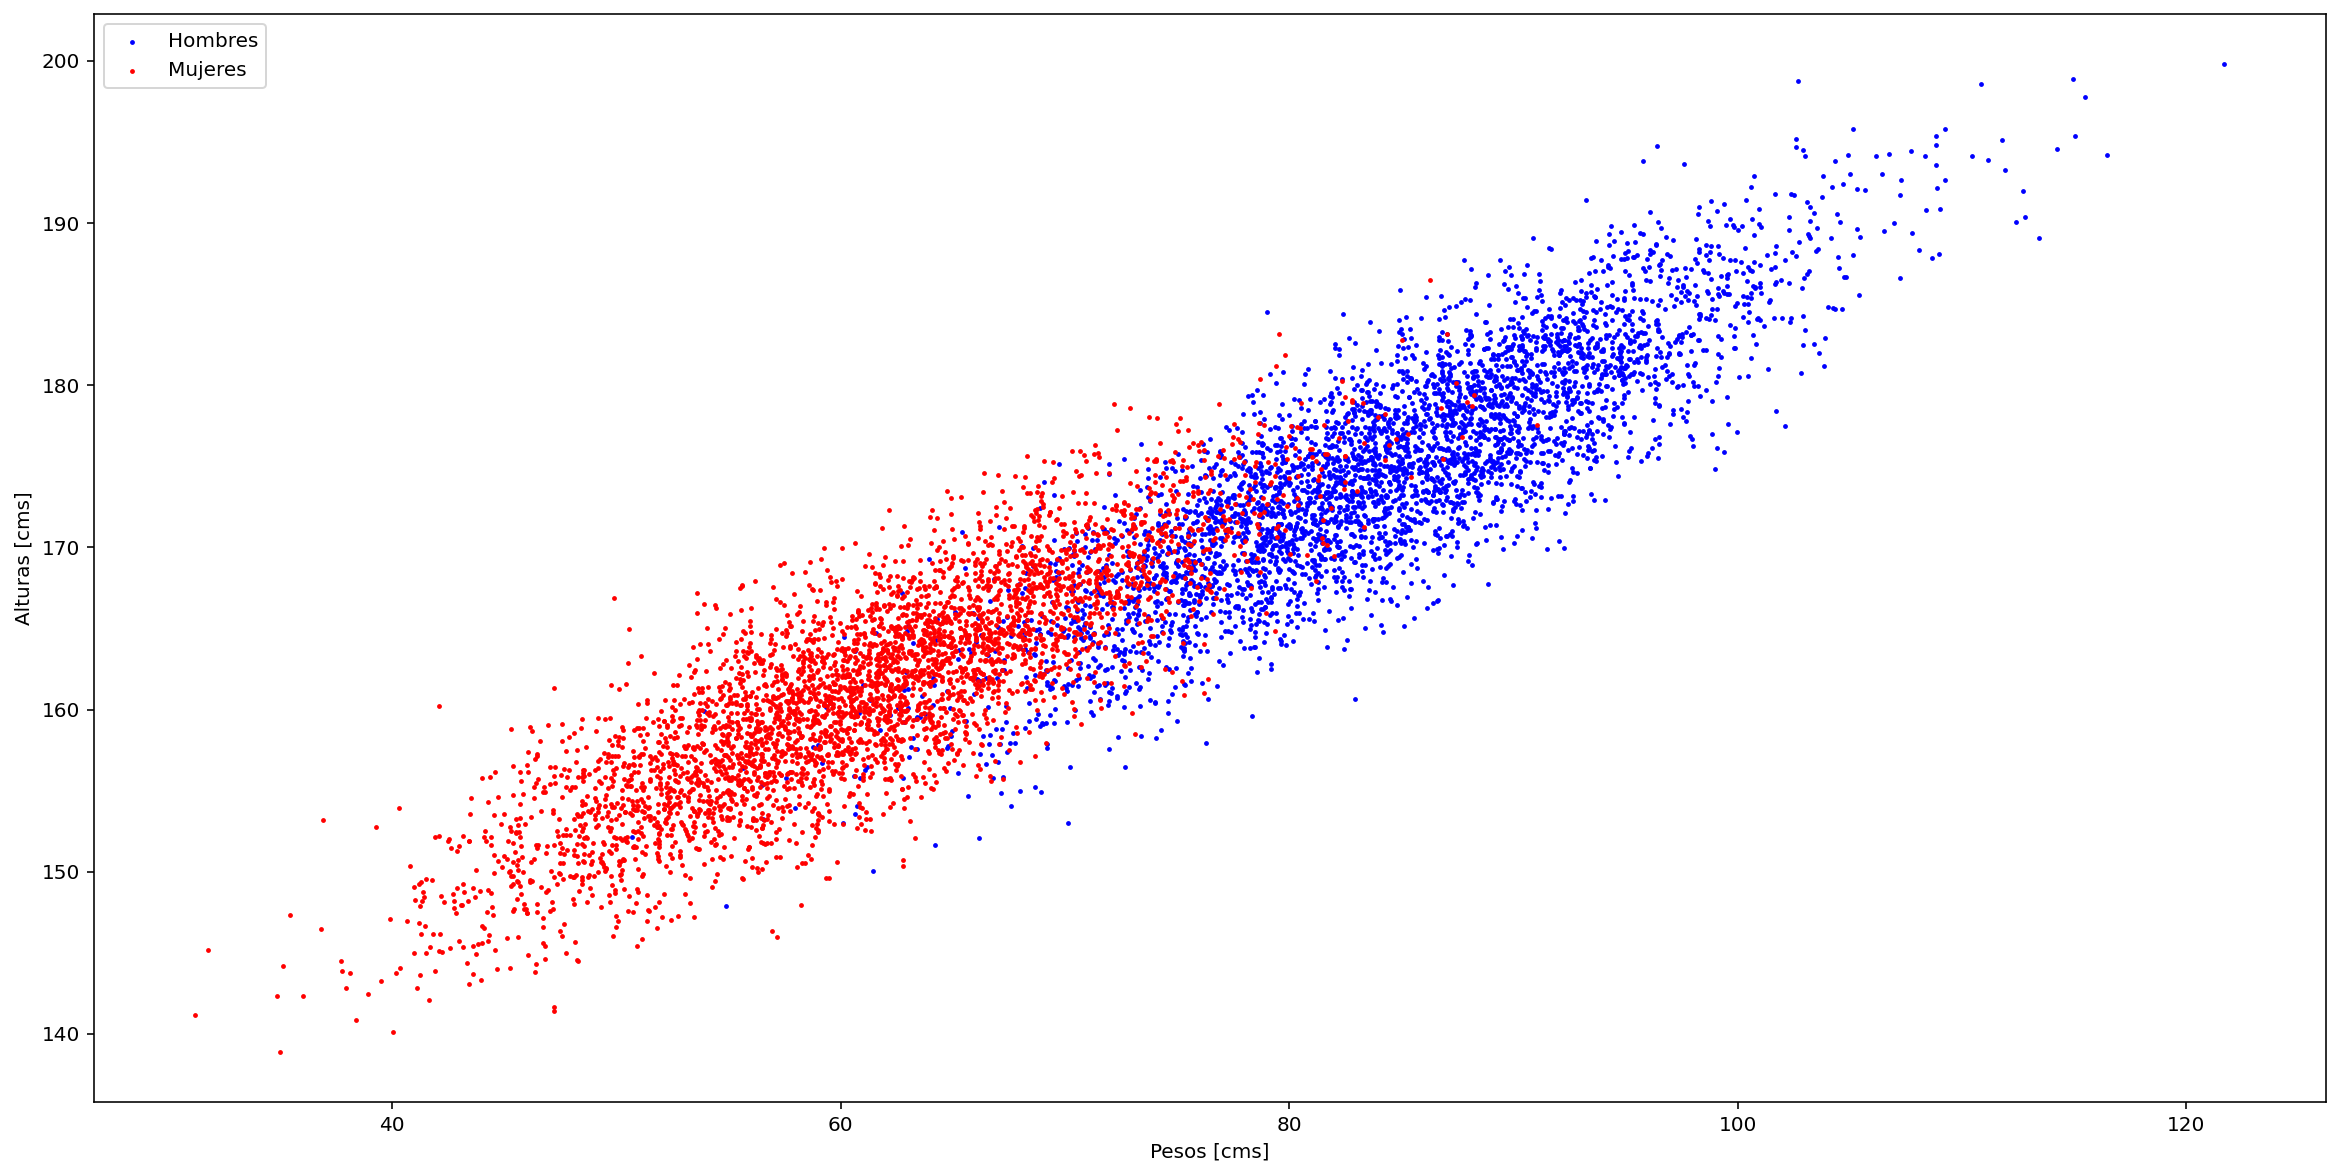

In [29]:
%matplotlib inline
f = plt.figure(figsize=(20,10))
plt.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=2, label='Hombres')
plt.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=2, label='Mujeres')
plt.xlabel('Pesos [cms]')
plt.ylabel('Alturas [cms]')
plt.legend()
plt.show()

# Regla de Bayes (Continuo)
\begin{equation}
P(Hombre | X_1, X_2) = \frac{p(X_1,X_2 | Hombre) P(Hombre)}{p(X_1,X_2)} \\ \\
\end{equation}

\begin{equation}
P(Mujer | X_1, X_2) = \frac{p(X_1,X_2 | Mujer) P(Mujer)}{p(X_1,X_2)}
\end{equation}

Que tenemos?
\begin{equation}
P(Hombre) = \frac{N_{H}}{N_H + N_M} \quad
\end{equation}

\begin{equation}
P(Mujer) = \frac{N_{M}}{N_H + N_M} \quad
\end{equation}


\begin{equation}
\large
p(X_1,X_2) = p(X_1,X_2 | Mujer) P(Mujer) + p(X_1,X_2 | Hombre) P(Hombre)
\end{equation}

Con estimar:
\begin{equation}
P(X_1,X_2 | Mujer) \quad y \quad
P(X_1,X_2 | Hombre) 
\end{equation}
\begin{equation}
o
\end{equation}
\begin{equation}
p(X_1,X_2 | Mujer) \quad y \quad
p(X_1,X_2 | Hombre) 
\end{equation}

# Bayes Gaussiano (Quadratic Discriminant Analisys)

\begin{equation}
P(Hombre | X_1, X_2) = \frac{p(X_1,X_2 | Hombre) P(Hombre)}{p(X_1,X_2)} \\
P(Mujer | X_1, X_2) = \frac{p(X_1,X_2 | Mujer) P(Mujer)}{p(X_1,X_2)} \\
p(X_1,X_2) = p(X_1,X_2 | Hombre) P(Hombre) + p(X_1,X_2 | Mujer) P(Mujer)
\end{equation}

\begin{equation}
P(C_0 | X_1, X_2)  \rightarrow p \\
P(C_1 | X_1, X_2) \rightarrow (1-p) \\
\end{equation}
### Log-odds
\begin{equation}
\frac{p}{1-p} = \frac{p(X_1,X_2 | C_0) P(C_0)}{
 p(X_1,X_2 | C_1) P(C_1)}
\end{equation}

In [53]:
peso_altura_hombres = data.loc[data['Genero']=='Hombre'][['Peso', 'Altura']].values
peso_altura_mujeres = data.loc[data['Genero']=='Mujer'][['Peso', 'Altura']].values

In [54]:
peso_altura_hombres

array([[ 97.432, 181.908],
       [ 73.324, 172.459],
       [ 77.618, 172.705],
       ...,
       [ 92.479, 176.934],
       [ 83.84 , 177.866],
       [ 75.461, 170.91 ]])

In [55]:
mean_hombres = peso_altura_hombres.mean(axis=0)
mean_mujeres = peso_altura_mujeres.mean(axis=0)

In [56]:
mean_hombres, mean_mujeres

(array([ 84.45643089, 174.91616521]), array([ 61.13789495, 161.30471261]))

In [57]:
peso_altura_hombres.shape

(4001, 2)

In [302]:
cov_hombres = np.cov(peso_altura_hombres.T)
cov_mujeres = np.cov(peso_altura_mujeres.T)

In [ ]:
cov = 

In [59]:
cov_hombres

array([[80.71054209, 56.29362173],
       [56.29362173, 53.03283768]])

In [60]:
cov_mujeres

array([[75.19882927, 50.77709625],
       [50.77709625, 47.57064786]])

In [61]:
np.corrcoef(peso_altura_hombres.T)

array([[1.        , 0.86044205],
       [0.86044205, 1.        ]])

In [70]:
from scipy.stats import multivariate_normal, norm

[-2.         -1.95959596 -1.91919192 -1.87878788 -1.83838384 -1.7979798
 -1.75757576 -1.71717172 -1.67676768 -1.63636364 -1.5959596  -1.55555556
 -1.51515152 -1.47474747 -1.43434343 -1.39393939 -1.35353535 -1.31313131
 -1.27272727 -1.23232323 -1.19191919 -1.15151515 -1.11111111 -1.07070707
 -1.03030303 -0.98989899 -0.94949495 -0.90909091 -0.86868687 -0.82828283
 -0.78787879 -0.74747475 -0.70707071 -0.66666667 -0.62626263 -0.58585859
 -0.54545455 -0.50505051 -0.46464646 -0.42424242 -0.38383838 -0.34343434
 -0.3030303  -0.26262626 -0.22222222 -0.18181818 -0.14141414 -0.1010101
 -0.06060606 -0.02020202  0.02020202  0.06060606  0.1010101   0.14141414
  0.18181818  0.22222222  0.26262626  0.3030303   0.34343434  0.38383838
  0.42424242  0.46464646  0.50505051  0.54545455  0.58585859  0.62626263
  0.66666667  0.70707071  0.74747475  0.78787879  0.82828283  0.86868687
  0.90909091  0.94949495  0.98989899  1.03030303  1.07070707  1.11111111
  1.15151515  1.19191919  1.23232323  1.27272727  1.3

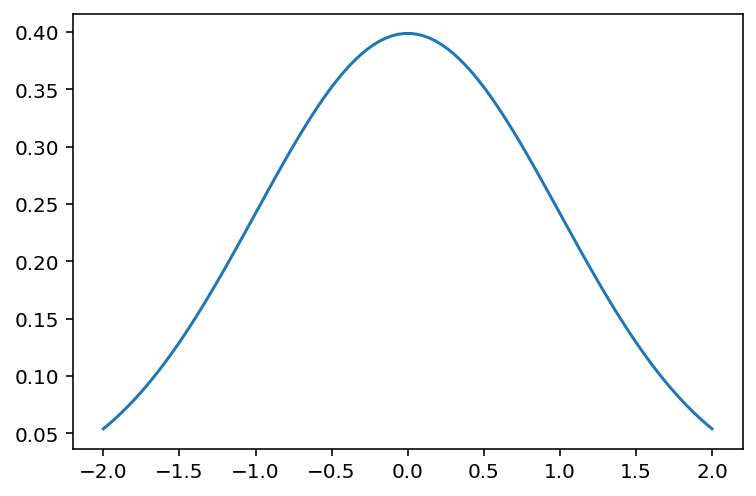

In [75]:
x = np.linspace(-2, 2, 100)
print(x)
norm_x = norm.pdf(x, loc=0, scale=1)
plt.plot(x, norm_x)

In [89]:
p_a = np.array([
    [60, 154],
    [90, 190]
])


In [170]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [192]:
model = LinearDiscriminantAnalysis(
    store_covariance=True
#     priors={'Hombre': 0.7, 'Mujer': 0.3}
)

In [193]:
# model.priors

In [194]:
model.fit(data[['Peso', 'Altura']].values, data['Genero'])

LinearDiscriminantAnalysis(store_covariance=True)

In [195]:
# model.coef_

In [196]:
# model.intercept_

In [197]:
model.predict(p_a)

array(['Mujer', 'Hombre'], dtype='<U6')

In [198]:
model.score(data[['Peso', 'Altura']].values, data['Genero'])

0.9167395924490561

In [199]:
model.priors_

array([0.50018752, 0.49981248])

In [200]:
model.classes_

array(['Hombre', 'Mujer'], dtype='<U6')

In [201]:
model.means_

array([[ 84.45643089, 174.91616521],
       [ 61.13789495, 161.30471261]])

In [202]:
model.covariance_

array([[77.93622815, 53.52300796],
       [53.52300796, 50.29019005]])

In [ ]:
model.priors_
model.means_
model.covariance_

In [102]:
l_h = multivariate_normal.pdf(p_a, mean_hombres, cov_hombres)

In [85]:
l_m = multivariate_normal.pdf(p_a, mean_mujeres, cov_mujeres)

In [90]:
l_h * 0.7 / (l_h * 0.7 + l_m * 0.3)

array([0.13761763, 0.99153701])

In [91]:
l_h * 0.5 / (l_h * 0.5 + l_m * 0.5)

array([0.06401287, 0.98047335])

In [63]:
def get_gauss_prob(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres):
    data_np = data
    likelihood_class_1 = multivariate_normal.pdf(data_np, mean_hombres, cov_hombres)
    likelihood_class_2 = multivariate_normal.pdf(data_np, mean_mujeres, cov_mujeres)
    N_class_1 = len(peso_altura_hombres)
    N_class_2 = len(peso_altura_mujeres)
    prior_1 = N_class_1/(N_class_1 + N_class_2)
    prior_2 = N_class_2/(N_class_1 + N_class_2)
    total = likelihood_class_1 * prior_1 + likelihood_class_2 * prior_2
    p_class_1 = likelihood_class_1 * prior_1/total
    p_class_2 = likelihood_class_2 * prior_2/total
    return p_class_1, p_class_2

In [64]:
def get_acc_gauss(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres):
    p_class_1, p_class_2 = get_gauss_prob(data[['Peso', 'Altura']].values, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres)
    return ((p_class_1>p_class_2)==(data['Genero']=='Hombre')).sum()/len(p_class_1)

In [65]:
acc_train_Bayes = get_acc_gauss(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres)
print(acc_train_Bayes)

0.9167395924490561


In [211]:
acc_cv_Bayes = get_acc_gauss(test, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres)
print(acc_cv_Bayes)

0.9225


In [213]:
data[['Peso', 'Altura']]

,Peso,Altura
0,61.235,162.402
1,97.432,181.908
2,73.324,172.459
3,55.193,157.748
4,56.886,151.798
...,...,...
7994,92.479,176.934
7995,62.215,160.083
7996,83.840,177.866
7997,75.461,170.910


In [224]:
for k, v in data['Genero'].value_counts().to_dict().items():
    print(k, v/len())

TypeError: len() takes exactly one argument (0 given)

In [226]:
X = data[['Peso', 'Altura']]
y = data['Genero']

In [232]:
X[y == 'Mujer'].cov().values

array([[75.19882927, 50.77709625],
       [50.77709625, 47.57064786]])

In [294]:
from models import QDA

In [301]:
my_model = QDA()
my_model.fit(X, y)
my_model.predict(X)

array(['Mujer', 'Hombre', 'Mujer', ..., 'Hombre', 'Hombre', 'Mujer'],
      dtype='<U6')

array(['Mujer', 'Hombre', 'Mujer', ..., 'Hombre', 'Hombre', 'Mujer'],
      dtype='<U6')

In [283]:
np.argmax(ps, axis=1)

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
def get_gauss_prob(data, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres):
    data_np = data
    likelihood_class_1 = multivariate_normal.pdf(data_np, mean_hombres, cov_hombres)
    likelihood_class_2 = multivariate_normal.pdf(data_np, mean_mujeres, cov_mujeres)
    N_class_1 = len(peso_altura_hombres)
    N_class_2 = len(peso_altura_mujeres)
    prior_1 = N_class_1/(N_class_1 + N_class_2)
    prior_2 = N_class_2/(N_class_1 + N_class_2)
    total = likelihood_class_1 * prior_1 + likelihood_class_2 * prior_2
    p_class_1 = likelihood_class_1 * prior_1/total
    p_class_2 = likelihood_class_2 * prior_2/total
    return p_class_1, p_class_2

In [209]:
my_model = QDA()

In [ ]:
my_model.

In [66]:
N = 300
X = np.linspace(data.min()['Peso'], data.max()['Peso'], N)
Y = np.linspace(data.min()['Altura'], data.max()['Altura'], N)
X, Y = np.meshgrid(X, Y)

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# The distribution on the variables X, Y packed into pos.
Z_H = multivariate_normal.pdf(pos, mean_hombres, cov_hombres)
Z_M = multivariate_normal.pdf(pos, mean_mujeres, cov_mujeres)
Z_gaus, _ = get_gauss_prob(pos, mean_hombres, mean_mujeres, cov_hombres, cov_mujeres)

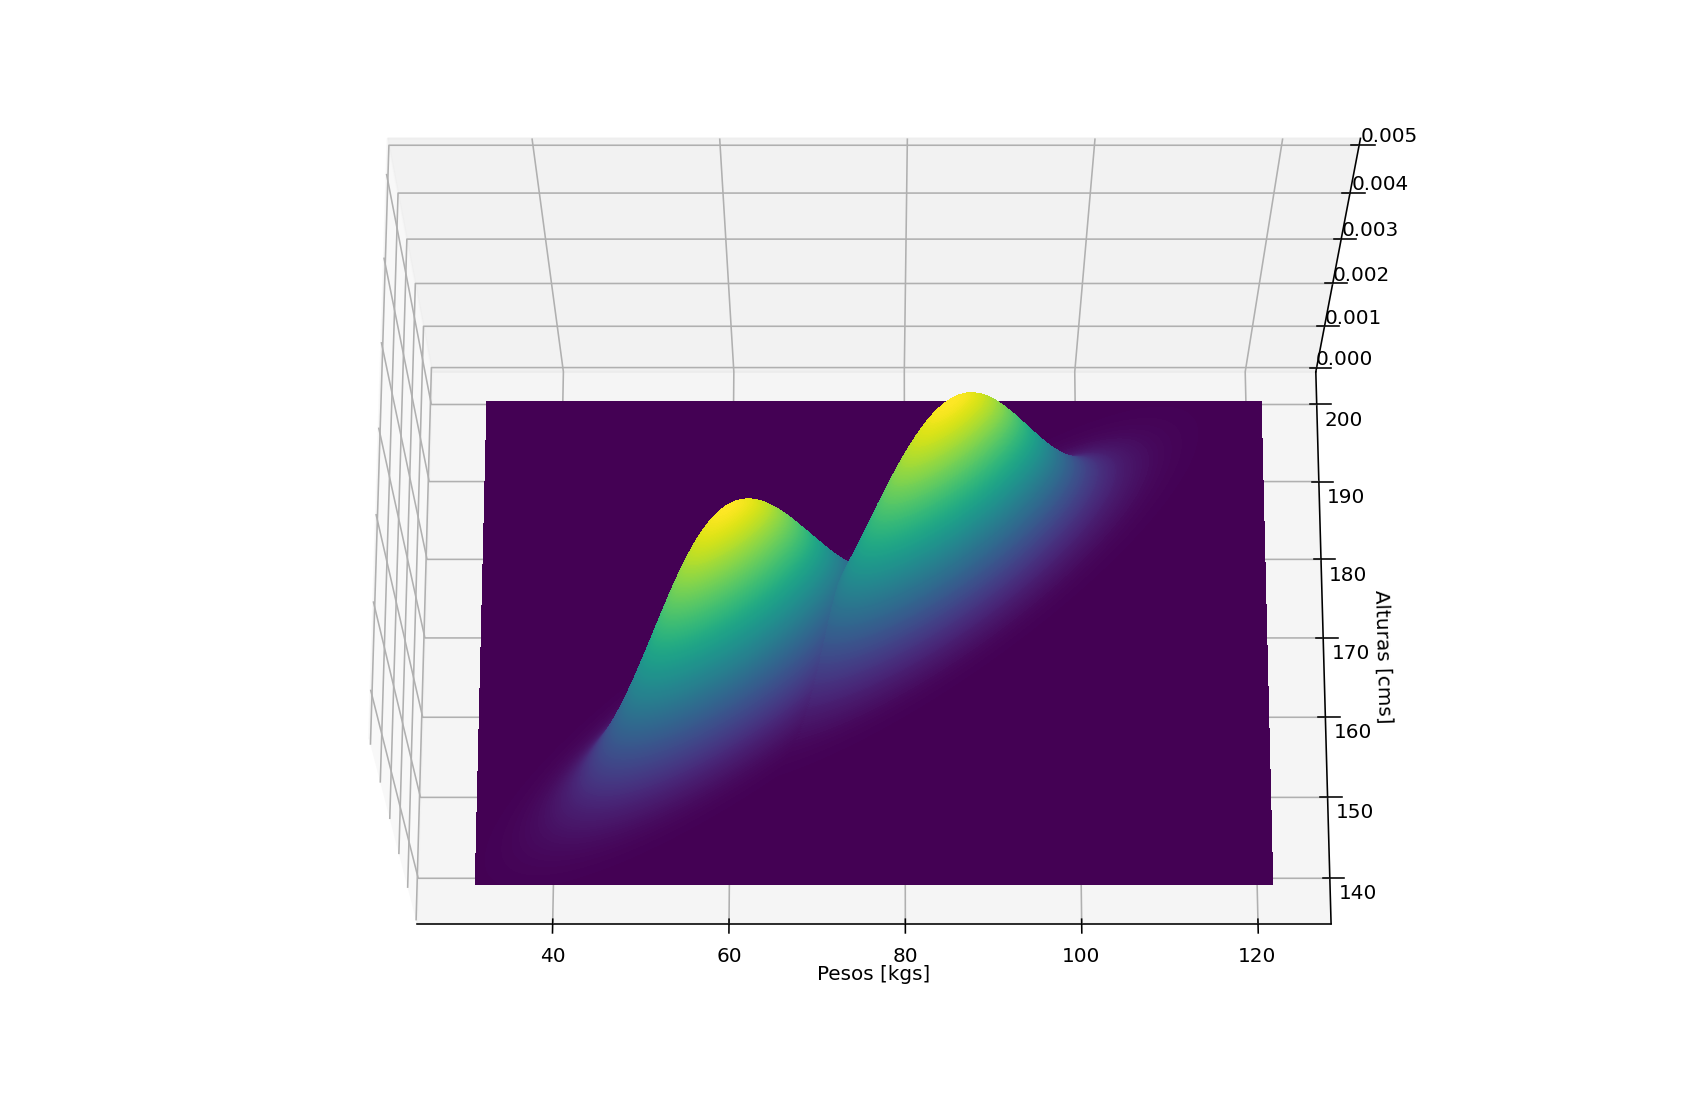

In [67]:
%matplotlib inline
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
cm = plt.cm.RdBu
ax.contourf(X, Y, Z_H, 256)
ax.contourf(X, Y, Z_M, 256)
ax.view_init(70, -90)
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()

### Log odds
\begin{equation}
\frac{P(C_0 | X_1, X_2)}{P(C_1 | X_1, X_2)} = \frac{p(X_1,X_2 | C_0) P(C_0)}{p(X_1,X_2 | C_1) P(C_1)} \\
\end{equation}

\begin{equation}
odds = \frac{p(X_1,X_2 | C_0)}{p(X_1,X_2 | C_1)} \\
\end{equation}

Dado que las densidades son Gaussianas:

\begin{equation}
\large
\frac{\sqrt{|2\pi\Sigma_0|}^{-1} e^{-\frac{1}{2} (x-\mu_0)^T\Sigma_0(x-\mu_0) }P(C_0)}
{\sqrt{|2\pi\Sigma_1|}^{-1} e^{-\frac{1}{2} (x-\mu_1)^T\Sigma_1(x-\mu_1) } P(C_1)} = 1
\end{equation}

Aplicando logaritmos y agrupando todas las constantes en T:

\begin{equation}
\large
log{\frac{\sqrt{|2\pi\Sigma_0|}^{-1} e^{-\frac{1}{2} (\vec{x}-\vec{\mu}_0)^T\Sigma_0 \big (\vec{x}-\vec{\mu}_0) }P(C_0)}
{\sqrt{|2\pi\Sigma_1|}^{-1} e^{-\frac{1}{2} (\vec{x}-\vec{\mu}_1)^T\Sigma_1(\vec{x}-\vec{\mu}_1) } P(C_1)}} = 0
\end{equation}

\begin{equation}
\large
-\frac{1}{2}(\vec{x}-\vec{\mu}_0)^T\Sigma_0^{-1}(\vec{x}-\vec{\mu}_0) + \frac{1}{2}(\vec{x}-\vec{\mu}_1)^T\Sigma_1^{-1}(\vec{x}-\vec{\mu}_1)  - ln(|\Sigma_0|) + ln(|\Sigma_1|) + log(\frac{P(C_0)}{P(C_1)}) = 0
\end{equation}

Notar que es cuadratica

In [68]:
# Verificación ecuación
z_teorica = np.zeros([N, N])
log_cov_H = np.log(np.linalg.det(cov_hombres))
log_cov_M = np.log(np.linalg.det(cov_mujeres))
log_priors = np.log(len(peso_altura_hombres)/len(peso_altura_mujeres))
for row in range(pos.shape[0]):
    for col in range(pos.shape[1]):
        nomalized_x_H = pos[row, col] - mean_hombres
        nomalized_x_M = pos[row, col] - mean_mujeres
        term_1 = nomalized_x_H.dot(np.linalg.inv(cov_hombres)).dot(nomalized_x_H)/2
        term_2 = nomalized_x_M.dot(np.linalg.inv(cov_mujeres)).dot(nomalized_x_M)/2
        z_teorica[row, col] = - term_1 + term_2 - log_cov_H + log_cov_M + log_priors

NameError: name 'acc_cv_Bayes' is not defined

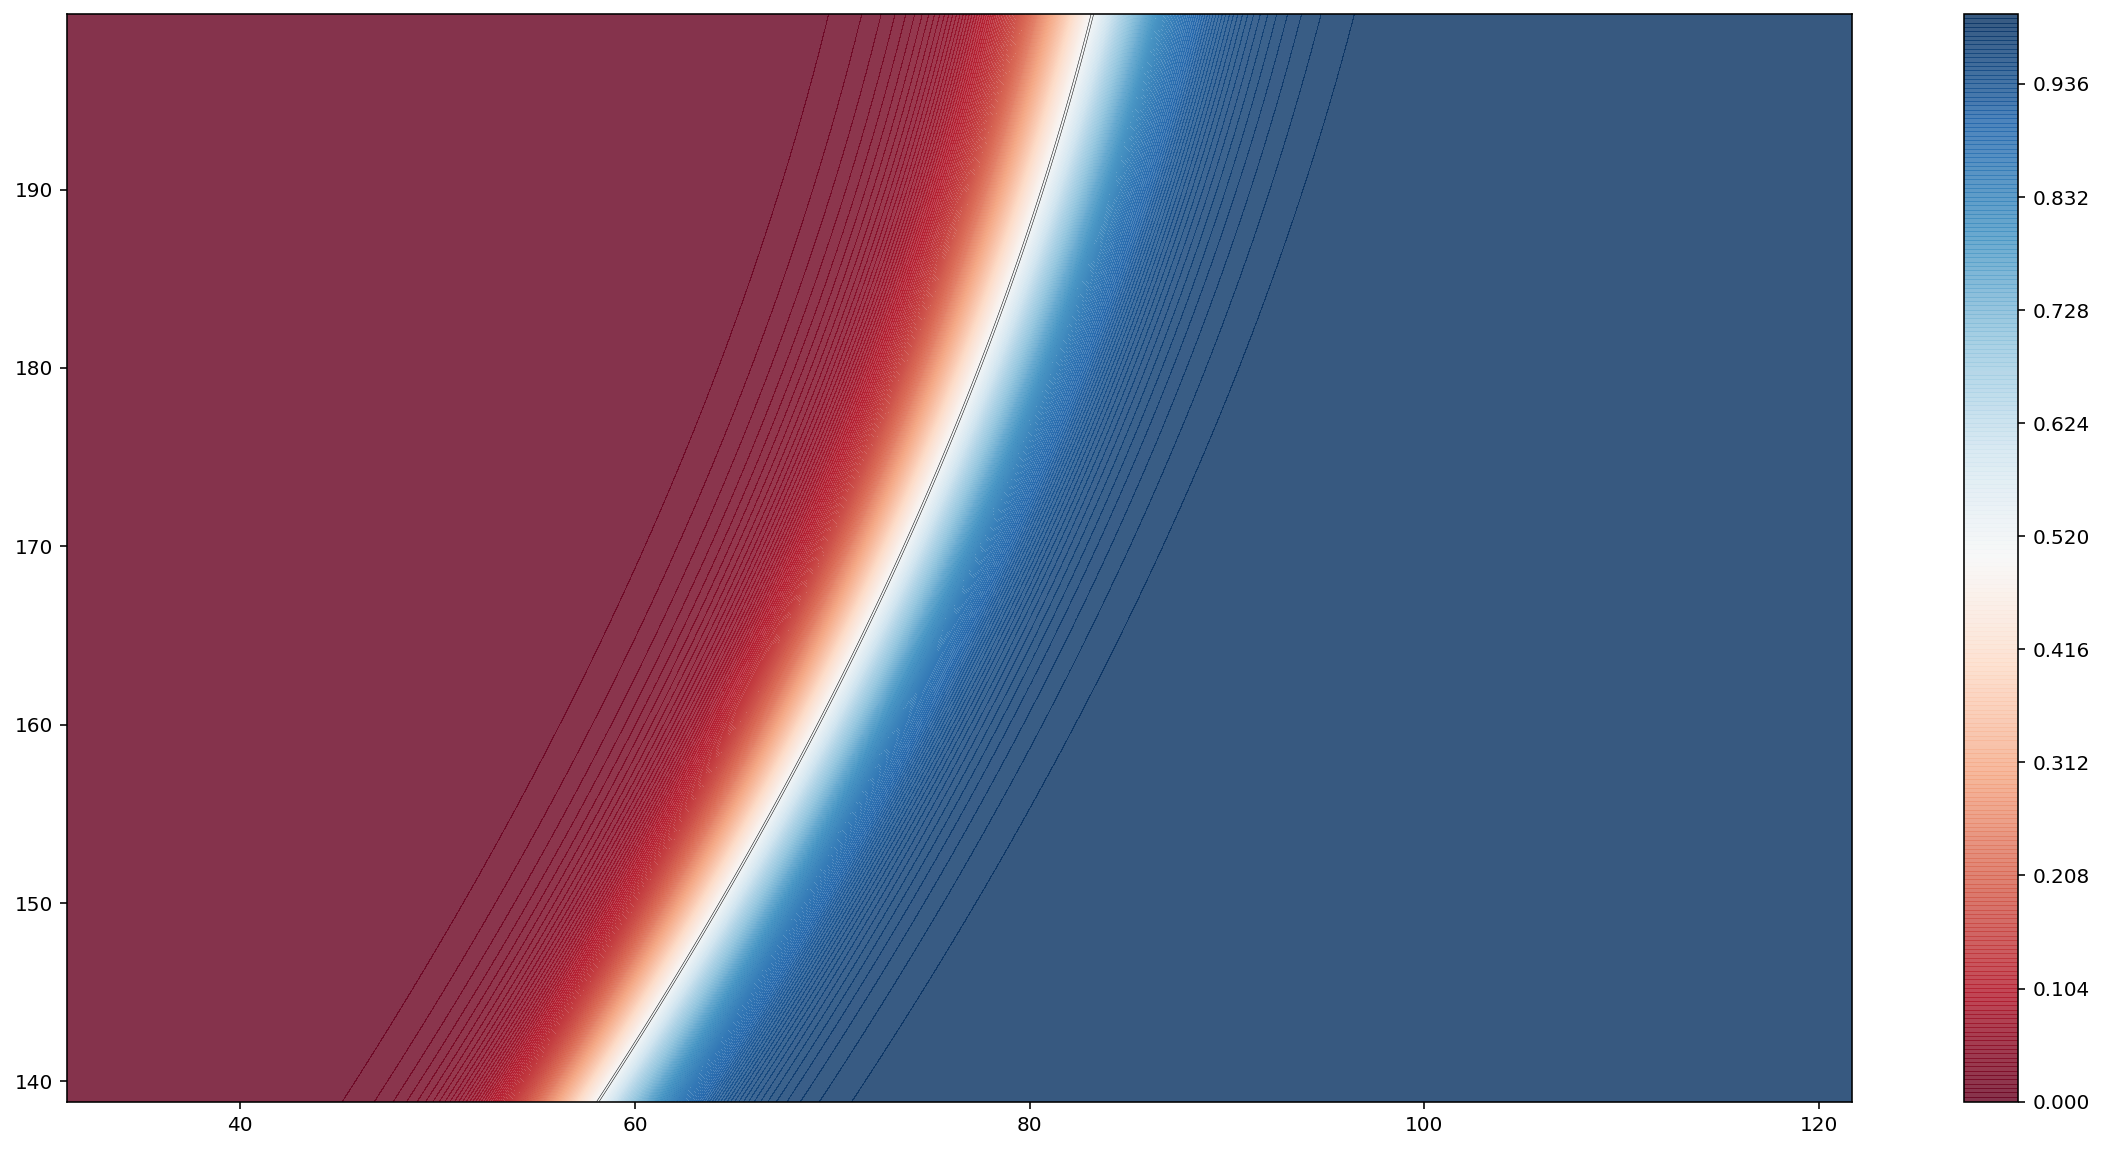

In [69]:
# Verificación
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_gaus, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
z_levels = np.logspace(-5,-2,10)/4
#ax.contour(X, Y, Z_H, z_levels)
#ax.contour(X, Y, Z_M, z_levels)
ax.contour(X, Y, Z_gaus, (0.5,), colors='k', linewidths=0.25)
ax.contour(X, Y, z_teorica, (0,), colors='k', linewidths=0.25)
ax.set_title('TRAIN: ' + str(np.round(acc_train_Bayes*100)/100) + ' - CV:' + str(np.round(acc_cv_Bayes*100)/100))
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()

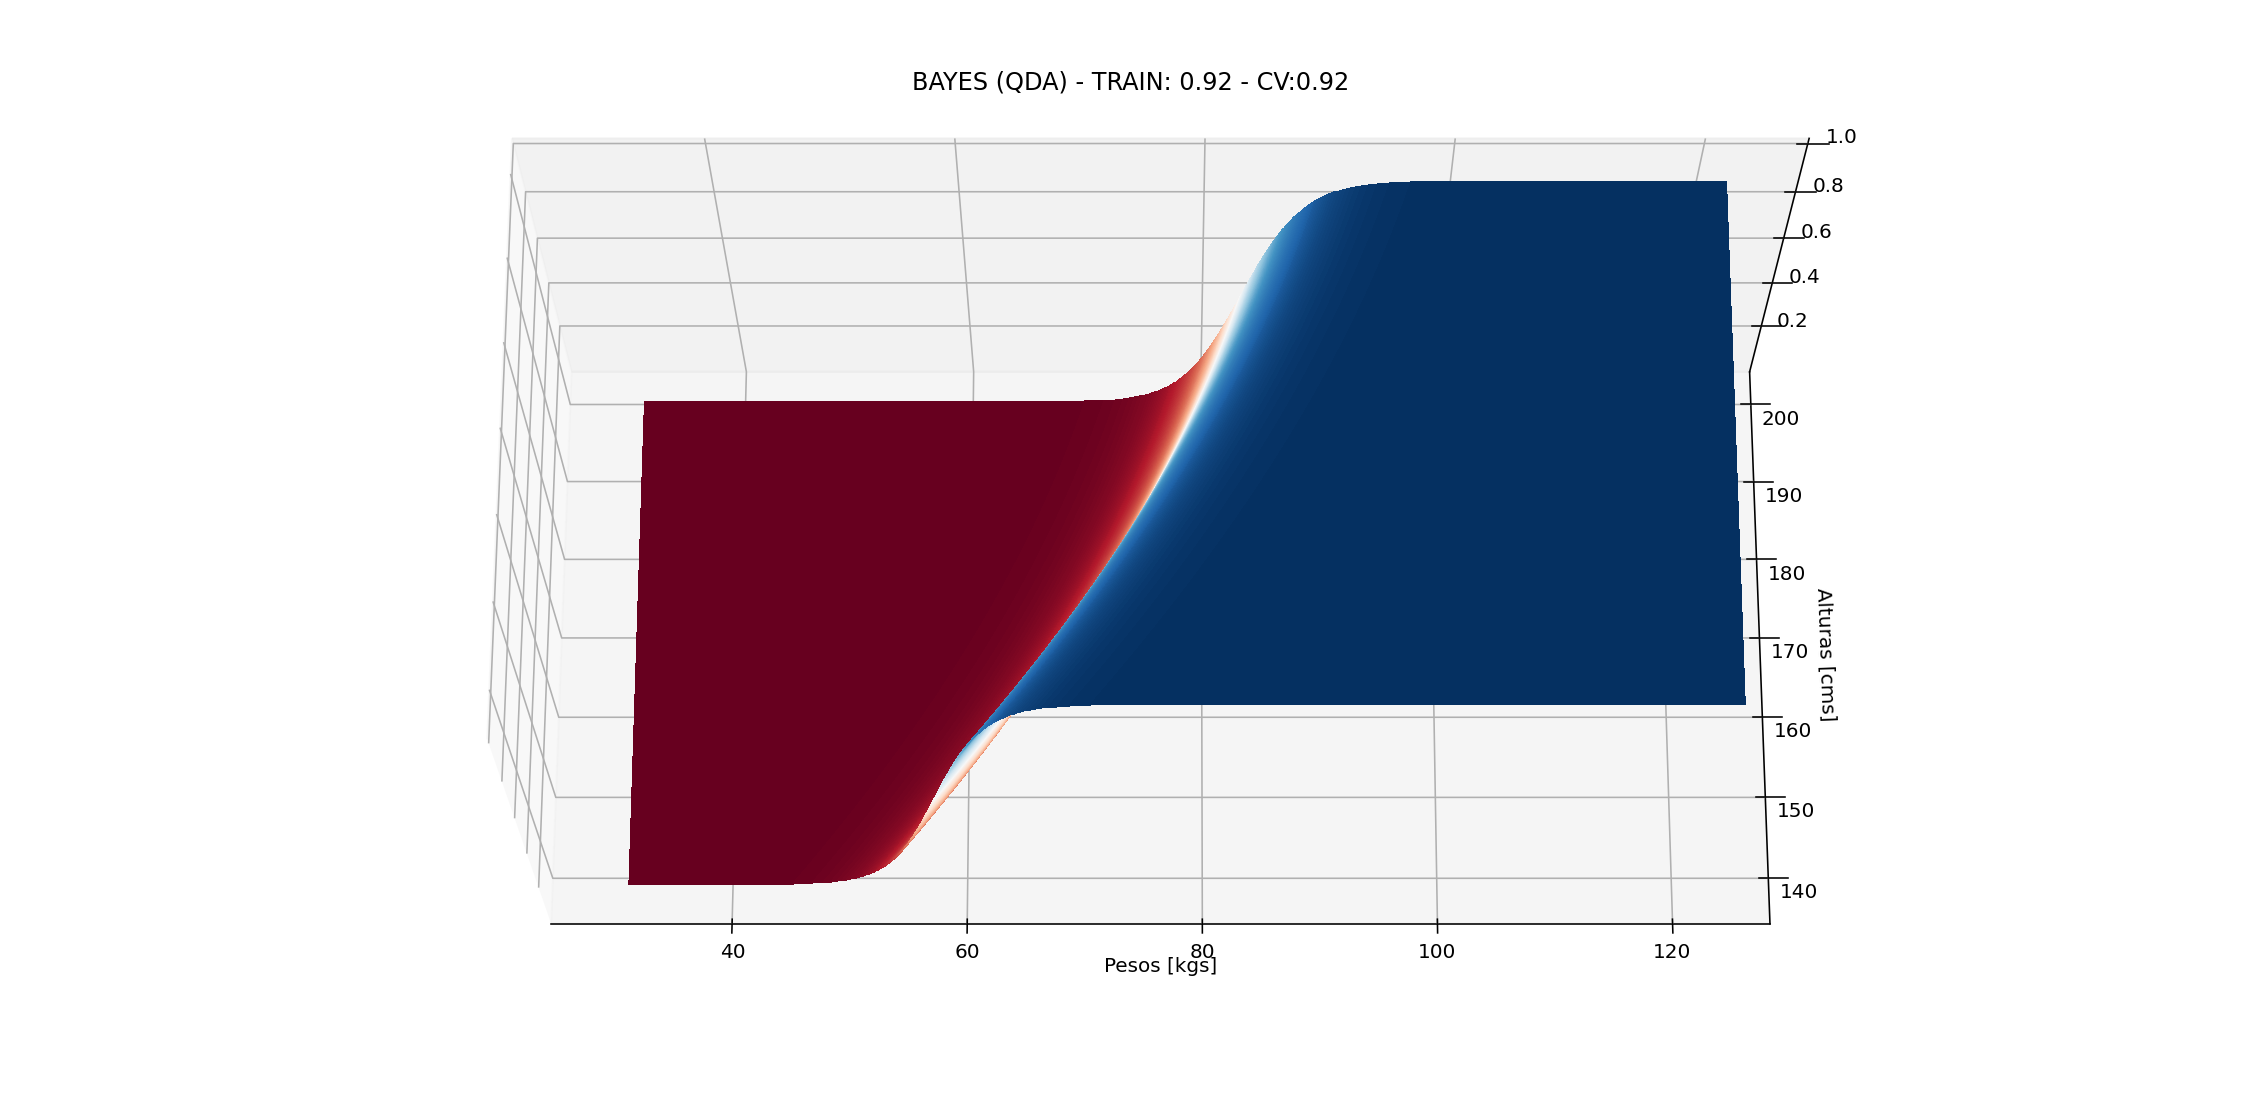

In [22]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.gca(projection='3d')
cm = plt.cm.RdBu
ax.contourf(X, Y, Z_gaus, 256, vmin=0., vmax=1., cmap=cm)
ax.set_title('BAYES (QDA) - TRAIN: ' + str(np.round(acc_train_Bayes*100)/100) + ' - CV:' + str(np.round(acc_cv_Bayes*100)/100))
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
ax.view_init(70, -90)
plt.show()

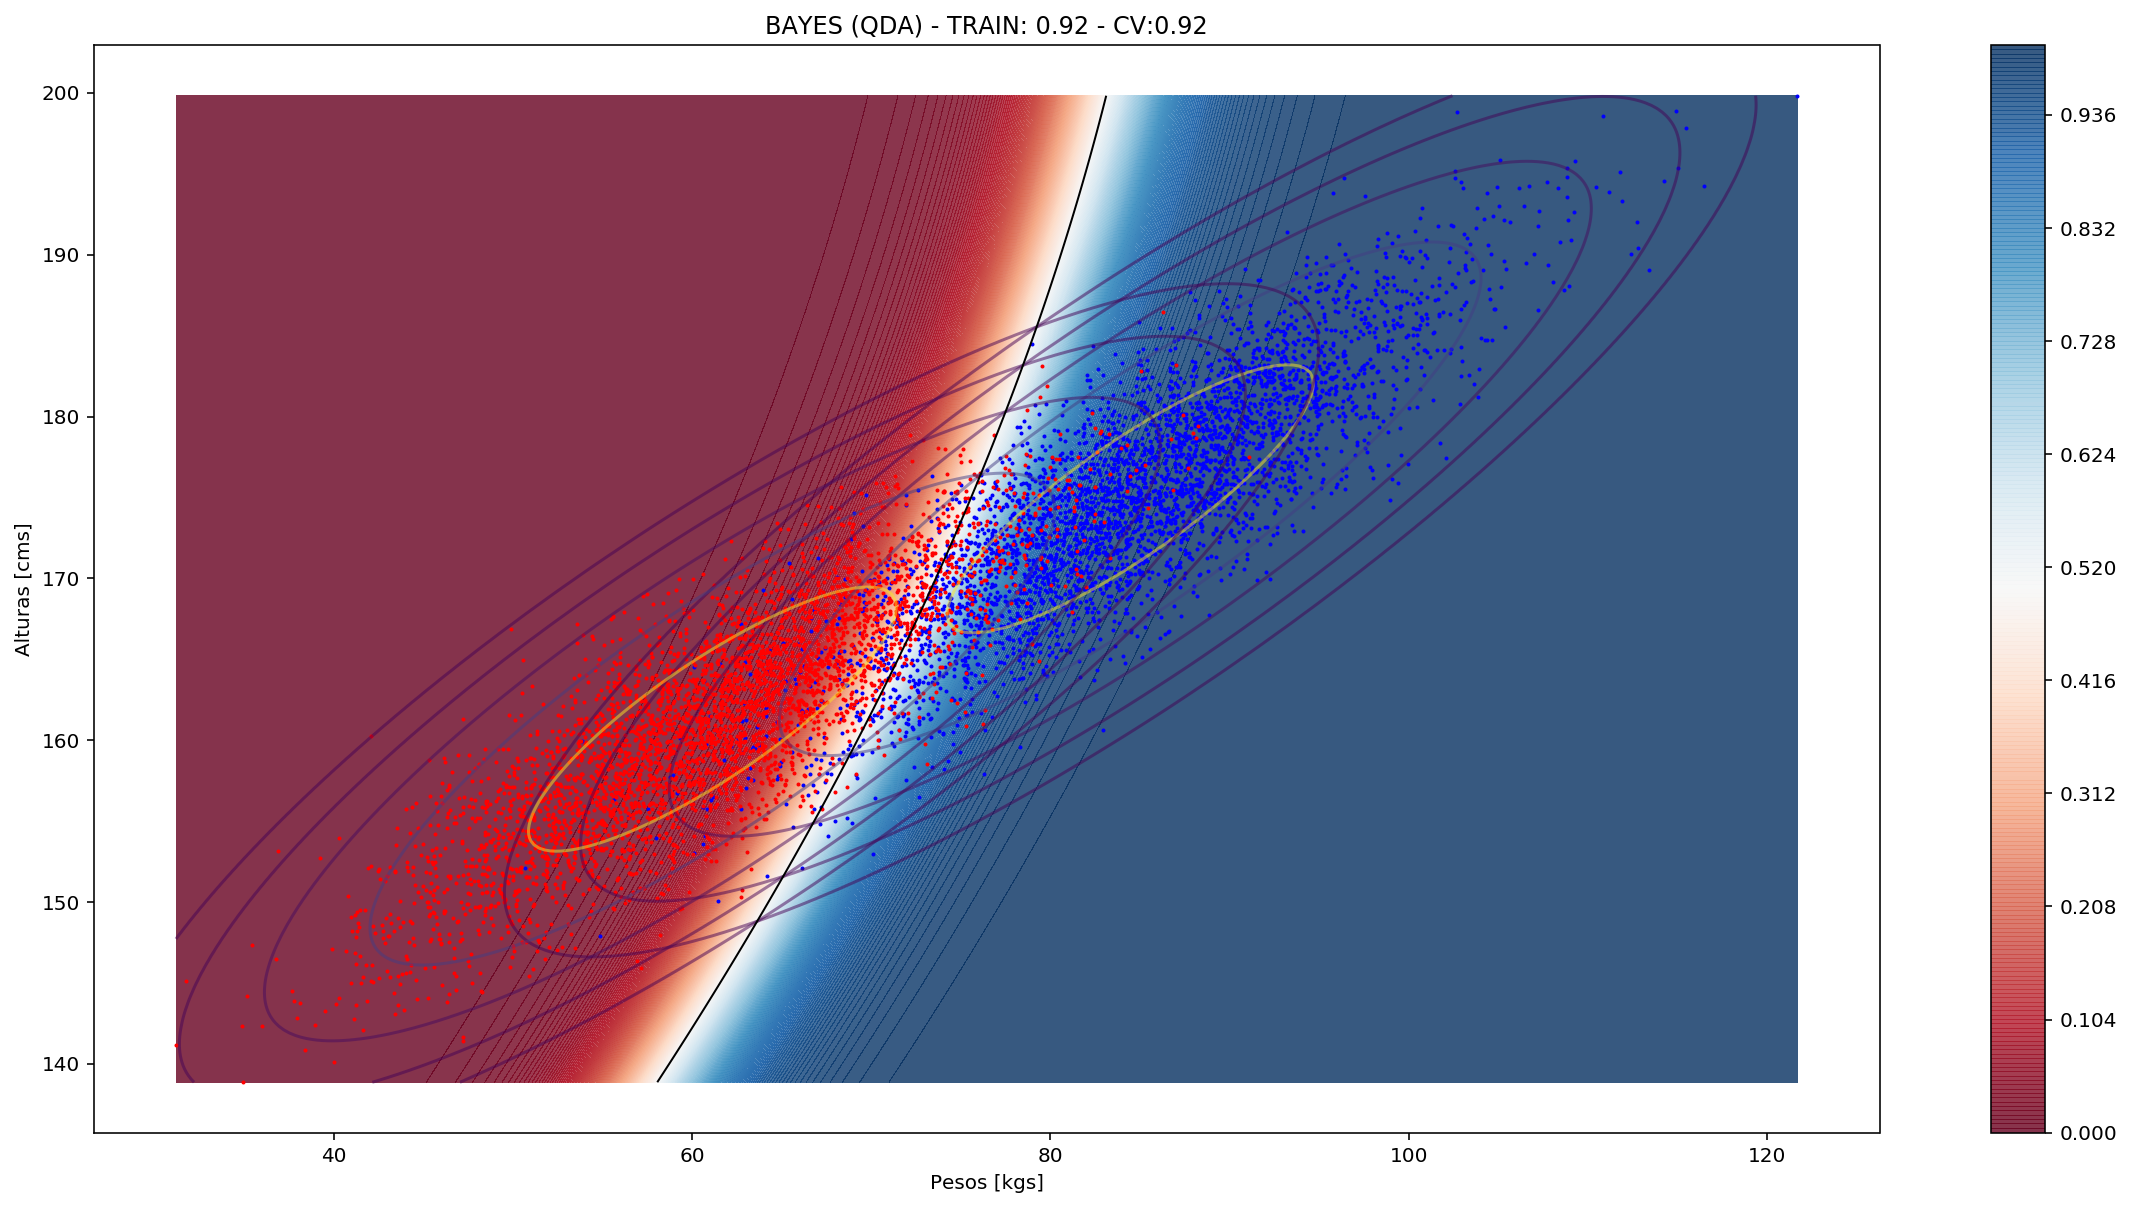

In [22]:
%matplotlib inline
fig = plt.figure(figsize=(20,10))
ax = fig.gca()
cm = plt.cm.RdBu
cf = ax.contourf(X, Y, Z_gaus, 256, alpha=.8, vmin=0., vmax=1., cmap=cm)
plt.colorbar(cf, ax=ax)
z_levels = np.logspace(-5,-2,5)/4
ax.contour(X, Y, Z_H, z_levels, alpha=0.5)
ax.contour(X, Y, Z_M, z_levels, alpha=0.5)
ax.contour(X, Y, Z_gaus, (0.5,), colors='k', linewidths=1)
ax.scatter(data_hombres[:,0], data_hombres[:,1], color='b', s=1, label='Hombres')
ax.scatter(data_mujeres[:,0], data_mujeres[:,1], color='r', s=1, label='Mujeres')
ax.set_title('BAYES (QDA) - TRAIN: ' + str(np.round(acc_train_Bayes*100)/100) + ' - CV:' + str(np.round(acc_cv_Bayes*100)/100))
ax.set_ylabel('Alturas [cms]')
ax.set_xlabel('Pesos [kgs]')
plt.show()

|Modelo| tipo| Train Acc| CV Acc|Comentarios
|-| -| -| -|-|
|Histogram - step 0.25|Bayes|0.97|0.68
|Histogram - step 0.25|Naive Bayes|0.89|0.88
|Histogram - step 0.5|Bayes|0.94|0.82
|Histogram - step 0.5|Naive Bayes|0.89|0.88
|Histogram - step 1|Bayes|0.92|0.90
|Histogram - step 1|Naive Bayes|0.89|0.88
|Histogram - step 4|Bayes|0.91|0.92| No generaliza por afuera de la zona de los puntos
|Histogram - step 4|Naive Bayes|0.89|0.88
|Histogram - step 8|Bayes|0.90|0.90
|Histogram - step 8|Naive Bayes|0.87|0.86
|Gaussian|Bayes|0.92|0.92|
|Gaussian|Naive Bayes|0.89|0.89|
|Regresion Logística|-|0.92|0.92|